# Plotting radial wave function for quark model

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import scipy as sp
from scipy import special, integrate
from collections import OrderedDict
import json
import os
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [16]:
def plot(ax, name, cutoff=[-sp.inf, sp.inf], tol=1E-5):
    data = pd.read_csv(name, delimiter=",", index_col=0)
    data = data.loc[(data.index > cutoff[0]) & (data.index < cutoff[1])]
    ax.plot(data.index, data['u'], linestyle="", marker=".")
    points = data["u"].index.values[:-1][(data["u"].abs().values[1:] < tol) ^ (data["u"].abs().values[:-1] < tol)]
    ivals = list()
    if data["u"].abs().values[0] < tol:
        ivals.append(data.index.values[0:1])
    ivals.append(points)
    if data["u"].abs().values[-1] < tol:
        ivals.append(data.index.values[-1:])
    ivals = sp.hstack(ivals).reshape((-1,2))
    label = ""
    for ival in ivals:
        label += "{} —» {} [{}]\n".format(ival, ival[-1]-ival[0], ival.mean())
    # ax.text(0, 0, label)
    ax.axhline(0, ls="--", color="gray")
    for span in ivals:
        ax.axvspan(*span, alpha=0.2)
    return ax

In [4]:
def plotDir(name, cutoff=[-sp.inf, sp.inf], tol=1E-5):
    with open("output/" + name + "/exclude") as f:
        pcls = f.read().splitlines()
    fig, ax = plt.subplots(len(pcls), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(pcls)))
    cfg = json.load(open("output/"+name+"/config","r"), object_pairs_hook=OrderedDict)
    pcls = {key: val for key,val in cfg.items() if key in pcls}
    for theax, thef in zip(ax, pcls):
        try:
            rMax = cfg[thef]["rMax"]
        except KeyError:
            rMax = sp.inf
            
        try:
            tol = cfg[thef]["limit"]
        except KeyError:
            pass
        
        theax.set_title(thef+"("+str(tol)+")")
        plot(theax, "output/"+name+"/data/"+thef, [cutoff[0], min(cutoff[1], rMax)], tol)

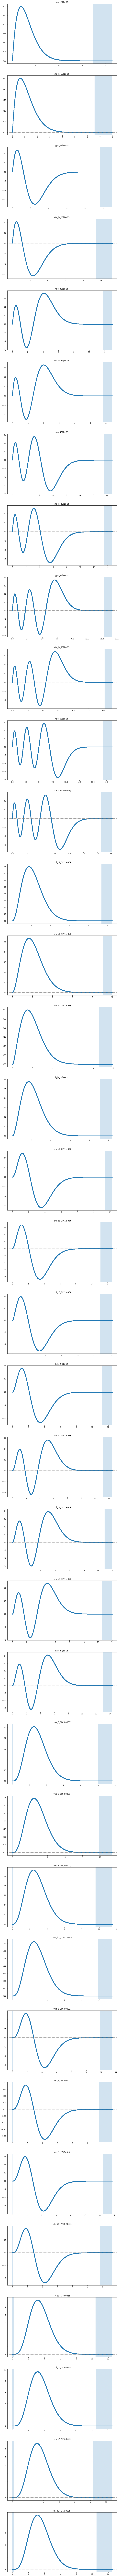

In [17]:
plotDir("scr.b-scr")

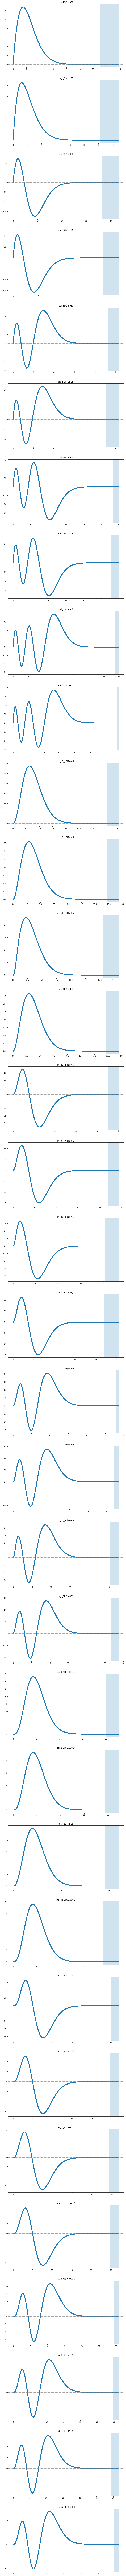

In [18]:
plotDir("scr.c-scr", [-sp.inf, sp.inf])

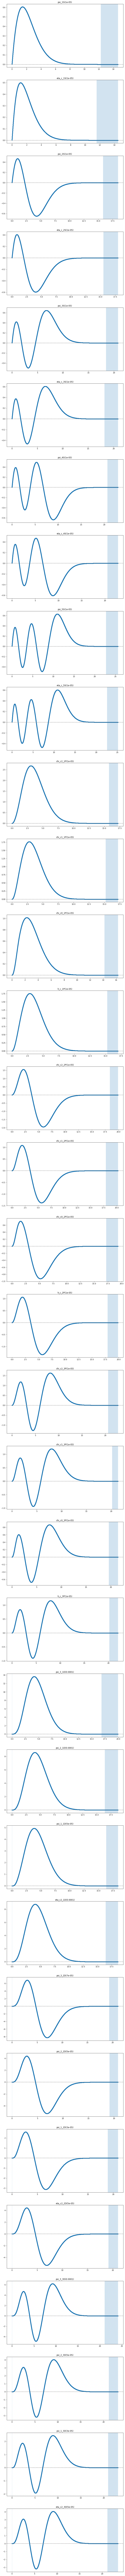

In [19]:
plotDir("lin.c-lin", [-sp.inf, sp.inf])